# Requirements

In [1]:
import pandas as pd

In [2]:
# Add as many imports as you need.
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [3]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # Download the dataset.


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [4]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('climate-data.csv')
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

In [5]:
# Write your code here. Add as many boxes as you need.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [7]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

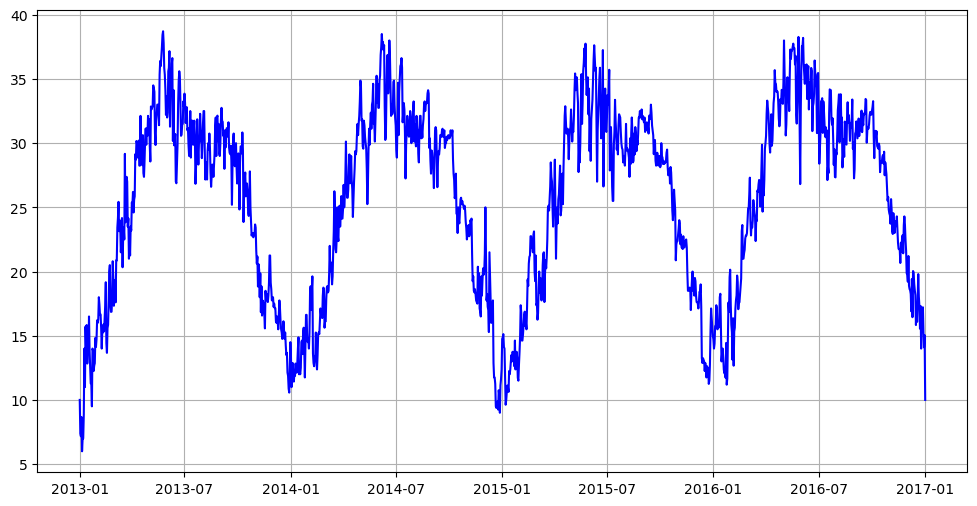

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(data['date']), data['meantemp'], color='blue')
plt.grid()
plt.show()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [10]:
# Write your code here. Add as many boxes as you need.
data['date'] = pd.to_datetime(data['date'])
data.set_index(keys=['date'], inplace=True)
data.sort_index(inplace=True)
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [11]:
for lag in range(1,4):
    for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
        data[f'{col}_lag_{lag}']=data[col].shift(lag)
data = data.dropna()
features = data.drop(columns=['meantemp', 'humidity', 'wind_speed', 'meanpressure'], axis=1)
target = 'meantemp'

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [12]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X = features
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [13]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor
model_r = RandomForestRegressor(n_estimators=100, random_state=42)
model_r.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [14]:
# Write your code here. Add as many boxes as you need.
y_pred = model_r.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [15]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('RadnomForest metrics:')
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)

RadnomForest metrics:
MSE: 3.4261064966940755
MAE: 1.4351940659783748
R2: 0.9370405082928852


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [16]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
model_x = XGBRegressor(n_estimators = 100, random_state=42)
model_x.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [17]:
# Write your code here. Add as many boxes as you need.
y_pred = model_x.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [18]:
# Write your code here. Add as many boxes as you need.
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('XGBoost metrics:')
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r2)

XGBoost metrics:
MSE: 4.071102044719351
MAE: 1.570936879043729
R2: 0.9251878143103113


# Laboratory Exercise - Bonus Task (+ 2 points)

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train_reshaped = np.expand_dims(X_scaled[:X_train.shape[0], :], axis=1)
X_test_reshaped = np.expand_dims(X_scaled[X_train.shape[0]:,:],axis=1)

In [22]:
y_train = y_train.values
y_test = y_test.values

In [30]:
model = Sequential([
    LSTM(64,activation='tanh', input_shape=(X_test_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    LSTM(32,activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
    ])

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam',loss='mse', metrics=['mae'])

In [32]:
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 772.8515 - mae: 26.9809 - val_loss: 687.8791 - val_mae: 25.1700
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 748.0176 - mae: 26.3221 - val_loss: 682.2751 - val_mae: 25.0605
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 752.2372 - mae: 26.5144 - val_loss: 672.9129 - val_mae: 24.8774
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 734.9227 - mae: 26.2009 - val_loss: 655.4323 - val_mae: 24.5330
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 704.9495 - mae: 25.6430 - val_loss: 622.7443 - val_mae: 23.8765
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 669.4268 - mae: 24.9421 - val_loss: 566.8093 - val_mae: 22.7065
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 596.2306 - mae: 23.5119 - val_loss: 486.6506 - val_mae: 20.9052
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 515.5951 - mae: 21.6933 - val_loss: 393.6795 - val_mae: 18.5803
Epoch 9/30
10/10

In [33]:
y_pred = model.predict(X_test_reshaped)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('LSTM metrics:')
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

LSTM metrics:
MSE: 42.7264148066342
MAE: 5.588603828932378
R2: 0.21484245708978844


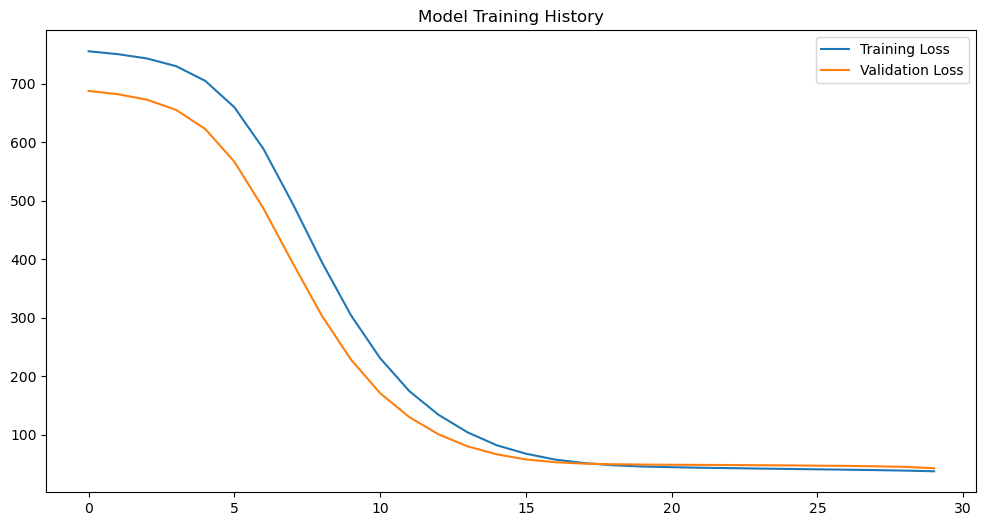

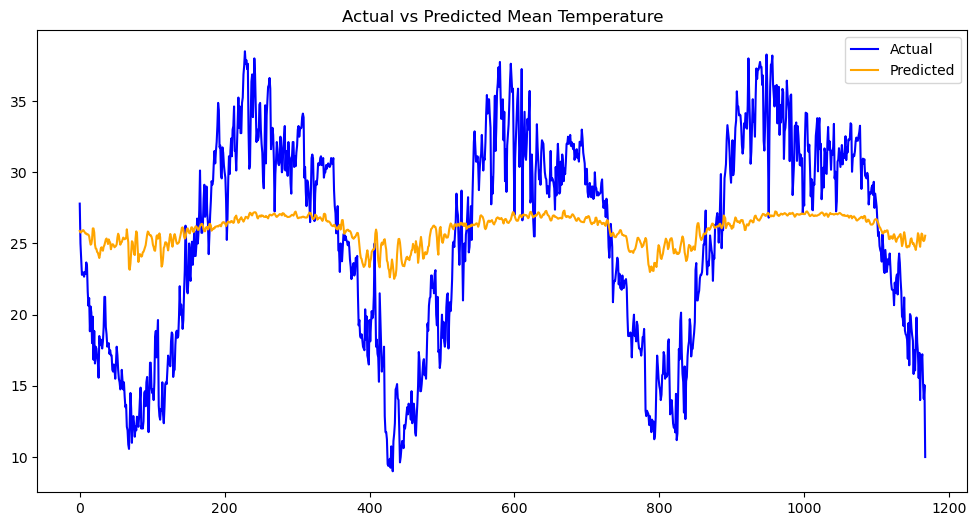

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Training History')
plt.show()

# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.legend()
plt.title('Actual vs Predicted Mean Temperature')
plt.show()